# Welcome to iPython Notebooks!

In [1]:
# Regular Python code can be written and executed:
a = 3

In [2]:
a ** 3

27

In [3]:
def SquareNumber(x):
    return x**2

SquareNumber(4)

16

In [4]:
#Tab Complete
SquareNumber(5)

25

# Additionally, you can insert raw text:

## in multiple formats

And other comments as well



In [5]:
from IPython.core.display import Image 
Image(width=600,url='http://funnystack.com/wp-content/uploads/2015/07/Funny-Books-16.jpg')

# Some Actual Data Uses for iPython

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

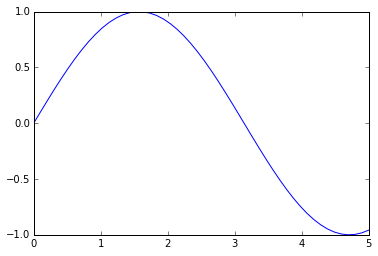

In [7]:
x = np.linspace(0,5)
plt.plot(x,np.sin(x))

# Using Pandas

In [8]:
# Defines an n-dimensional array (ndarray) with 10,000 random numbers in the range [0-500).
values1 = np.random.randint(500, size=10000) 

# Defines a pandas Series similar to the above ndarray.
values2 = pd.Series(np.random.randint(500, size=10000)) 

pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series):

In [9]:
values1[:10]

array([362, 498, 439, 252, 466,  89, 391,   5,  55, 465])

In [10]:
values2[:10]

0    466
1     15
2     97
3    181
4    407
5      9
6     61
7    313
8    423
9    244
dtype: int64

In [11]:
values2.iloc[5]

9

In [12]:
values2.loc[5]

9

In [13]:
values2.describe()

count    10000.000000
mean       246.853100
std        143.745909
min          0.000000
25%        122.000000
50%        246.000000
75%        371.000000
max        499.000000
dtype: float64

In [14]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

For non-numerical series objects, describe() will return a simple summary of the number of unique values and most frequently occurring ones.

np.nan is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the skipna=False flag when calling a method.

In [15]:
np.random.seed(34)
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df

,one,two,three
a,0.243835,-0.747318,-1.561177
c,-0.464253,-0.352062,-1.281492
e,0.289299,0.980029,0.477924
f,0.450818,0.752443,-0.510572
h,-0.705752,-0.424317,-0.232162


In [16]:
df.head(2)

,one,two,three
a,0.243835,-0.747318,-1.561177
c,-0.464253,-0.352062,-1.281492


In [17]:
df.shape

(5, 3)

In [18]:
#This is one way to index a column in pandas
df['one']

a    0.243835
c   -0.464253
e    0.289299
f    0.450818
h   -0.705752
Name: one, dtype: float64

In [19]:
#This is one way to index a row in pandas
df.loc['a']

one      0.243835
two     -0.747318
three   -1.561177
Name: a, dtype: float64

In [20]:
#Another way to index (multiple-columns)
df[['one','two','three']]

,one,two,three
a,0.243835,-0.747318,-1.561177
c,-0.464253,-0.352062,-1.281492
e,0.289299,0.980029,0.477924
f,0.450818,0.752443,-0.510572
h,-0.705752,-0.424317,-0.232162


In [21]:
#Add new columns
df['four'] = 'bar'
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,0.243835,-0.747318,-1.561177,bar,True
c,-0.464253,-0.352062,-1.281492,bar,False
e,0.289299,0.980029,0.477924,bar,True
f,0.450818,0.752443,-0.510572,bar,True
h,-0.705752,-0.424317,-0.232162,bar,False


In [22]:
df['one'].apply(lambda x: x+1)

a    1.243835
c    0.535747
e    1.289299
f    1.450818
h    0.294248
Name: one, dtype: float64

In [23]:
#Add new rows
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,0.243835,-0.747318,-1.561177,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.464253,-0.352062,-1.281492,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.289299,0.980029,0.477924,bar,True
f,0.450818,0.752443,-0.510572,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.705752,-0.424317,-0.232162,bar,False


In [24]:
df['five']

a     True
c    False
e     True
f     True
h    False
Name: five, dtype: bool

In [25]:
df['five'].count()

5

In [26]:
df['five'].unique()

array([True, False], dtype=object)

In [27]:
df['five'].value_counts()

True     3
False    2
dtype: int64

In [28]:
df.dtypes

one      float64
two      float64
three    float64
four      object
five        bool
dtype: object

# Summary Statistics

Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy. First, we import both of these libraries:

In [29]:
print 'MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min()) # minimum value 
print 'MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max()) # maximum value
print 'RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(values2.ptp()) #range of the values
print 'MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean()) # the mean of the values
print 'STD(values1) = ' + str(values1.std()) + '\t\tSTD(values2) = ' + str(values2.std()) #standard dev of the values
print 'VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var()) # the variance of 

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 247.2855		MEAN(values2) = 246.8531
STD(values1) = 143.740176672		STD(values2) = 143.745909191
VARIANCE(values1) = 20661.2383897	VARIANCE(values2) = 20662.886409


In [30]:
pd.DataFrame(values1).describe()

,0
count,10000.000000
mean,247.285500
std,143.747364
min,0.000000
25%,123.000000
50%,246.000000
75%,372.000000
max,499.000000


In [31]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1.815140,-2.094749,1.035956
c,-1.434141,-0.278229,0.059514
e,-1.308312,-0.001286,1.261047
f,-0.186324,1.429928,-0.791102
h,-0.297739,0.961950,-1.070441


In [32]:
#Add new columns
df['four'] = 'bar'
df['five'] = df['one'] > 0
df.describe()

,one,two,three,five
count,5.000000,5.000000,5.000000,5
mean,-0.282275,0.003523,0.098995,0.2
std,1.302703,1.363393,1.047577,0.4472136
min,-1.434141,-2.094749,-1.070441,False
25%,-1.308312,-0.278229,-0.791102,0
50%,-0.297739,-0.001286,0.059514,0
75%,-0.186324,0.961950,1.035956,0
max,1.815140,1.429928,1.261047,True


In [33]:
df.describe(include='all')

,one,two,three,four,five
count,5.000000,5.000000,5.000000,5,5
unique,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,bar,NaN
freq,NaN,NaN,NaN,5,NaN
mean,-0.282275,0.003523,0.098995,NaN,0.2
std,1.302703,1.363393,1.047577,NaN,0.4472136
min,-1.434141,-2.094749,-1.070441,NaN,False
25%,-1.308312,-0.278229,-0.791102,NaN,0
50%,-0.297739,-0.001286,0.059514,NaN,0
75%,-0.186324,0.961950,1.035956,NaN,0


In [34]:
#Even more stats!
import scipy as sp
from scipy import stats

In [35]:
#Not all functions are robust to all data types (scipy can't ignore categorical data and fails)
stats.describe(df)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [36]:
#You have to filter the dataframe yourself
b = df[['one','two','three']]
stats.describe(b)

DescribeResult(nobs=5, minmax=(array([-1.43414066, -2.09474937, -1.07044067]), array([ 1.81514048,  1.42992772,  1.26104693])), mean=array([-0.28227511,  0.00352259,  0.09899498]), variance=array([ 1.69703603,  1.85884151,  1.09741798]), skewness=array([ 0.83689138, -0.60415334,  0.0211987 ]), kurtosis=array([-0.58877776, -0.7955926 , -1.67868048]))

In [37]:
y = np.sort(values1)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th

/afs/crc.nd.edu/user/k/kfeldman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


123

In [38]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

/afs/crc.nd.edu/user/k/kfeldman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


372

In [39]:
np.percentile(values1, q=[25, 75], interpolation='lower')

array([123, 372])

# Probability

In [40]:
import scipy.special as special
n = 100  # number of coin flips
h = 61  # number of heads
q = .5  # null-hypothesis of fair coin

In [41]:
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n / (q*(1-q)))
z

2.1999999999999997

In [42]:
pval = 2 * (1 - stats.norm.cdf(z))
pval

0.02780689502699718